In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvo as vo

In [2]:
# Download catalog
service = vo.dal.TAPService("https://exoplanetarchive.ipac.caltech.edu/TAP")

# List of column names: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
sql_query = "SELECT pl_name,disc_facility,tic_id,pl_radj,pl_bmassj,pl_eqt,st_rad,sy_jmag "+\
            "FROM pscomppars "+\
            "WHERE tran_flag=1"

results = service.search(sql_query)

# Save to table:
df = results.to_table().to_pandas()
df.rename(columns={'pl_name': 'planet_name', 'pl_eqt': 'eq_temp', 'pl_radj': 'radius'}, inplace=True)
df

,planet_name,disc_facility,tic_id,radius,pl_bmassj,eq_temp,st_rad,sy_jmag
0,Kepler-276 c,Kepler,TIC 138213510,0.259,0.05200,563.0,1.03,14.234
1,Kepler-829 b,Kepler,TIC 123451768,0.188,0.01600,857.0,0.97,13.699
2,K2-283 b,K2,TIC 266017624,0.314,0.03830,1186.0,0.82,12.579
3,Kepler-477 b,Kepler,TIC 158633329,0.185,0.01550,649.0,0.79,12.274
4,HAT-P-15 b,HATNet,TIC 353459965,1.060,1.94000,904.0,1.07,10.194
...,...,...,...,...,...,...,...,...
3447,K2-357 b,K2,TIC 293459761,0.332,0.04200,735.0,1.00,12.366
3448,K2-356 b,K2,TIC 20536788,0.204,0.01840,624.0,0.86,11.957
3449,K2-355 b,K2,TIC 186853124,0.201,0.01790,1066.0,0.92,12.404
3450,TOI-1518 b,Multiple Observatories,TIC 427761355,1.875,2.30000,2492.0,1.95,8.429


In [3]:
# Load ACCCESS targets
df2 = pd.read_csv('targets.csv')
df2

,planet_name,published,in_prep,obs_complete,future,n_obs_successful,n_obs_unsuccessful,n_scheduled_total
0,GJ 1214 b,1,0,1,0,3,0,3
1,HAT-P-23 b,1,0,1,0,5,5,10
2,HAT-P-26 b,0,0,0,1,2,2,4
3,HATS-5 b,0,0,1,0,3,3,6
4,WASP-4 b,1,0,1,0,4,2,6
5,WASP-16 b,0,0,1,0,3,5,8
6,WASP-18 b,0,0,1,0,3,2,5
7,WASP-19 b,1,0,1,0,6,1,7
8,WASP-31 b,1,0,1,0,3,1,4
9,WASP-39 b,0,0,1,0,2,2,4


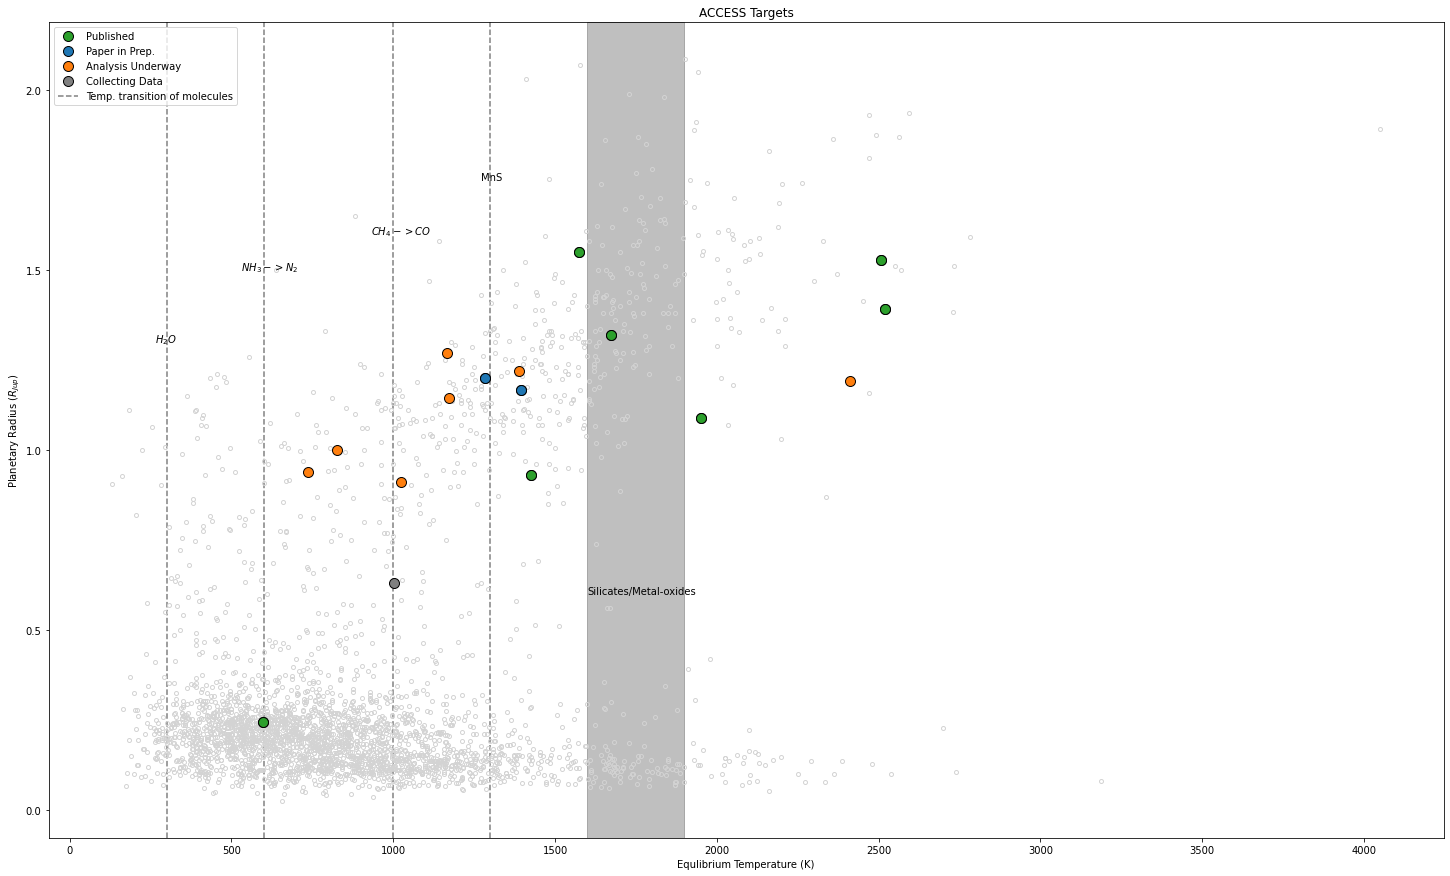

In [4]:
################################################################################
# Make figure
fig, ax = plt.subplots(figsize=(25, 15))
ax.set_title('ACCESS Targets')
ax.set_xlabel('Equlibrium Temperature (K)')
ax.set_ylabel('Planetary Radius ($R_{Jup}$)')

# transition temperatures between important molecules in exoplanet atmospheres. Gotten from Ben's 2016 ACCESS poster
H2O = 300
NH3_N2 = 600
CH4_CO = 1000
MnS = 1300
Silicates_MetalOxides = [1600,1900]
ax.axvline(x = H2O, ls = '--', color ='k', alpha=0.5)
ax.text(H2O-35, 1.3, '$H_2O$')
ax.axvline(x = NH3_N2, ls = '--', color ='k', alpha=0.5)
ax.text(NH3_N2-70, 1.5, '$NH_3 -> N_2$')
ax.axvline(x = CH4_CO, ls = '--', color ='k', alpha=0.5)
ax.text(CH4_CO-70, 1.6, '$CH_4 -> CO$')
ax.axvline(x = MnS, ls = '--', color ='k', alpha=0.5)
ax.text(MnS-30, 1.75, 'MnS')
ax.axvspan(Silicates_MetalOxides[0], Silicates_MetalOxides[1], alpha=0.25, color='k')
ax.text(np.mean(Silicates_MetalOxides)-150, .6, 'Silicates/Metal-oxides')

# Plot all exoplanets
ax.plot(df.eq_temp, df.radius,
        ls='', marker='o', mec='lightgray', mfc='None', ms=4, label='')

# Plot our targets
for name in df2.planet_name[df2.future==1]:
    target = df[df.planet_name==name]
    ax.plot(target.eq_temp, target.radius,
            ls='', marker='o', mec='k', mfc='gray', ms=10, label='')
for name in df2.planet_name[df2.obs_complete==1]:
    target = df[df.planet_name==name]
    ax.plot(target.eq_temp, target.radius,
            ls='', marker='o', mec='k', mfc='C1', ms=10, label='')
for name in df2.planet_name[df2.in_prep==1]:
    target = df[df.planet_name==name]
    ax.plot(target.eq_temp, target.radius,
            ls='', marker='o', mec='k', mfc='C0', ms=10, label='')
for name in df2.planet_name[df2.published==1]:
    target = df[df.planet_name==name]
    ax.plot(target.eq_temp, target.radius,
            ls='', marker='o', mec='k', mfc='C2', ms=10, label='')

# Hack a legend
ax.plot([], [], ls='', marker='o', mec='k', mfc='C2', ms=10, label='Published')
ax.plot([], [], ls='', marker='o', mec='k', mfc='C0', ms=10, label='Paper in Prep.')
ax.plot([], [], ls='', marker='o', mec='k', mfc='C1', ms=10, label='Analysis Underway')
ax.plot([], [], ls='', marker='o', mec='k', mfc='gray', ms=10, label='Collecting Data')
ax.plot([], [], ls='--', color='k', ms=4, label='Temp. transition of molecules', alpha=0.5)
ax.legend(loc='upper left')

#plt.savefig('access_targets.pdf', bbox_inches='tight')